In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

In [3]:
df2 = df.sample(5000)

In [4]:
df2

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
29170,INN29171,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Offline,0,0,0,60.00,0,Canceled
28897,INN28898,2,0,1,2,Meal Plan 1,0,Room_Type 1,302,2018,9,16,Offline,0,0,0,100.00,0,Canceled
6100,INN06101,2,0,2,3,Meal Plan 1,0,Room_Type 1,167,2018,11,19,Online,0,0,0,85.00,2,Not_Canceled
28761,INN28762,1,0,1,0,Meal Plan 1,0,Room_Type 1,3,2017,10,19,Online,0,0,0,139.00,0,Not_Canceled
29110,INN29111,2,0,1,2,Meal Plan 1,0,Room_Type 2,133,2018,3,11,Offline,0,0,0,75.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28186,INN28187,2,0,0,1,Not Selected,0,Room_Type 1,0,2018,10,5,Online,0,0,0,92.98,0,Not_Canceled
24649,INN24650,3,0,0,3,Meal Plan 1,0,Room_Type 4,132,2018,9,22,Online,0,0,0,162.00,2,Not_Canceled
13019,INN13020,2,0,0,3,Meal Plan 1,0,Room_Type 1,136,2018,8,3,Online,0,0,0,105.30,1,Not_Canceled
3259,INN03260,1,0,1,2,Meal Plan 2,0,Room_Type 1,161,2018,3,25,Online,0,0,0,105.00,0,Canceled


In [5]:
pip install --user pycaret

Note: you may need to restart the kernel to use updated packages.


In [6]:
from pycaret.classification import * 

In [7]:
clf = setup(data=df2, target = "booking_status", session_id=123, normalize= True)

,Description,Value
0,session_id,123
1,Target,booking_status
2,Target Type,Binary
3,Label Encoded,"Canceled: 0, Not_Canceled: 1"
4,Original Data,"(5000, 19)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8577,0.9177,0.9147,0.8800,0.8969,0.6673,0.6690,0.2740
xgboost,Extreme Gradient Boosting,0.8534,0.9167,0.9113,0.8770,0.8937,0.6576,0.6595,6.3180
rf,Random Forest Classifier,0.8368,0.8996,0.9362,0.8408,0.8859,0.6023,0.6136,0.8720
gbc,Gradient Boosting Classifier,0.8365,0.8886,0.9214,0.8500,0.8841,0.6081,0.6148,2.6950
et,Extra Trees Classifier,0.8294,0.8875,0.9282,0.8374,0.8804,0.5855,0.5956,1.3640
ada,Ada Boost Classifier,0.8142,0.8664,0.8957,0.8409,0.8671,0.5592,0.5637,0.7740
lr,Logistic Regression,0.8108,0.8661,0.8965,0.8361,0.8651,0.5494,0.5538,2.1600
knn,K Neighbors Classifier,0.7905,0.8302,0.8649,0.8322,0.8482,0.5107,0.5118,2.3800
dt,Decision Tree Classifier,0.8285,0.7957,0.8885,0.8629,0.8752,0.6010,0.6028,0.0970
lda,Linear Discriminant Analysis,0.6322,0.7495,0.8937,0.6269,0.7369,0.1019,0.1979,11.7680


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [9]:
lr = create_model("lr", fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8200,0.8610,0.9072,0.8398,0.8722,0.5694,0.5742
1,0.8257,0.8716,0.8776,0.8667,0.8721,0.5986,0.5987
2,0.8057,0.8546,0.9030,0.8263,0.8629,0.5318,0.5380
3,0.7971,0.8529,0.8861,0.8268,0.8554,0.5170,0.5205
4,0.8057,0.8775,0.9030,0.8263,0.8629,0.5318,0.5380
5,0.8229,0.8783,0.8987,0.8486,0.8730,0.5813,0.5839
6,0.7971,0.8523,0.9114,0.8120,0.8588,0.5027,0.5134
7,0.8000,0.8734,0.8776,0.8353,0.8560,0.5295,0.5312
8,0.7943,0.8440,0.8771,0.8280,0.8519,0.5163,0.5186


In [10]:
gbc = create_model("gbc", fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8457,0.8672,0.9367,0.8506,0.8916,0.6264,0.6352
1,0.8314,0.8956,0.8861,0.8678,0.8768,0.6100,0.6103
2,0.8314,0.8790,0.9283,0.8397,0.8818,0.5908,0.5999
3,0.8371,0.8722,0.9198,0.8516,0.8844,0.6104,0.6156
4,0.8429,0.8944,0.9409,0.8447,0.8902,0.6166,0.6279
5,0.8600,0.9115,0.9367,0.8672,0.9006,0.6651,0.6708
6,0.8143,0.8861,0.9283,0.8209,0.8713,0.5424,0.5558
7,0.8314,0.8950,0.9030,0.8560,0.8789,0.6025,0.6048
8,0.8171,0.8710,0.8983,0.8413,0.8689,0.5680,0.5714


In [11]:
blend_specific_soft = blend_models(estimator_list = [lr,gbc], method = "soft")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8343,0.8707,0.9198,0.8482,0.8826,0.6026,0.6083
1,0.8314,0.8905,0.8819,0.8708,0.8763,0.6118,0.6119
2,0.8200,0.8741,0.9241,0.8295,0.8743,0.5609,0.5711
3,0.8314,0.8717,0.9072,0.8532,0.8793,0.6006,0.6037
4,0.8314,0.8915,0.9283,0.8397,0.8818,0.5908,0.5999
5,0.8400,0.9033,0.9241,0.8521,0.8866,0.6163,0.6222
6,0.7971,0.8750,0.9156,0.8097,0.8594,0.5002,0.5125
7,0.8314,0.8938,0.8987,0.8589,0.8784,0.6044,0.6060
8,0.8200,0.8652,0.8983,0.8446,0.8706,0.5758,0.5787


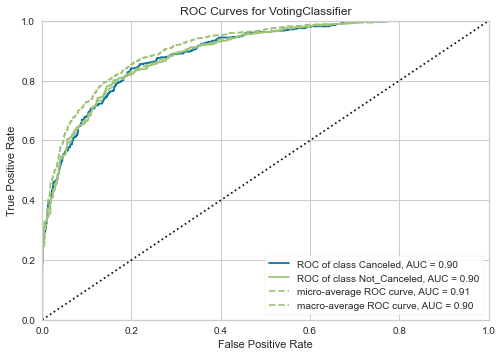

In [12]:
plot_model(blend_specific_soft)

In [1]:
### Model saving

In [ ]:
save_model(xgb, 'saved_xgb_model') 